In [206]:
import torch
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
import xarray as xr

rc("font", **{"family": "Times"})
rc("text", usetex=True)
# plt.rcParams['figure.dpi']= 300
plt.rcParams['figure.dpi']= 150

# x = xr.open_dataset("~/Desktop/pr_rcp85/pr_rcp85_land-cpm_birmingham-64_2.2km-coarsened-4x-2.2km-coarsened-4x_01_1hr_19801201-19801230.nc").pr.values.flatten()
# x = xr.open_dataset("~/Desktop/pr_rcp85/pr_rcp85_land-cpm_birmingham-64_2.2km-coarsened-4x-2.2km-coarsened-4x_01_1hr_20660501-20660530.nc").pr.values.flatten()
# x = xr.open_dataset("~/Desktop/pr_rcp85/pr_rcp85_land-cpm_birmingham-64_2.2km-coarsened-4x-2.2km-coarsened-4x_01_1hr_20801101-20801130.nc").pr.values.flatten()

x = torch.load("../../pr_rcp85_land-cpm_birmingham-64_2.2km-coarsened-4x-2.2km-coarsened-4x_01_1hr_flattened_sorted.pt").numpy()
y = np.sort(torch.load("../../results/results_2r_l2/117.pt", map_location=torch.device('cpu')).numpy().flatten())

In [207]:
def get_quantiles(sorted_array, desired_quantiles):
    indices = (len(sorted_array) - 1) * desired_quantiles
    indices_floor = np.floor(indices).astype(int)
    indices_ceil = np.ceil(indices).astype(int)

    indices_fractional_part = indices - indices_floor

    quantiles_floor = sorted_array[indices_floor]
    quantiles_ceil = sorted_array[indices_ceil]

    quantiles = quantiles_floor + indices_fractional_part * (quantiles_ceil - quantiles_floor)

    return quantiles

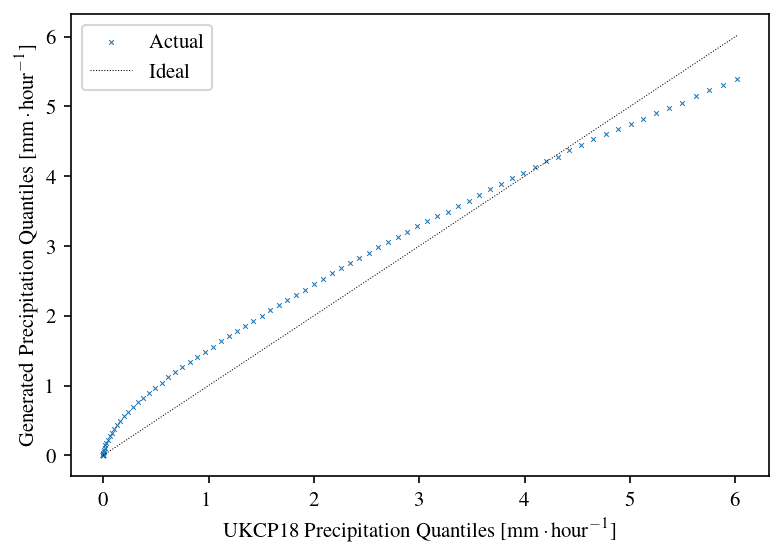

In [209]:
desired_quantiles = 1 - np.geomspace(1, 0.001, 100)
# plt.plot(quantiles)
# plt.show()

x_quantiles = get_quantiles(x, desired_quantiles)
y_quantiles = get_quantiles(y, desired_quantiles)

plt.figure(figsize=(6, 4))
plt.scatter(x_quantiles, y_quantiles, marker = 'x', s = 5, linewidth = 0.5, label = "Actual")
plt.plot(x_quantiles, x_quantiles, linewidth = 0.5, linestyle=":", c = "black", label = "Ideal")
plt.legend()

plt.xlabel('UKCP18 Precipitation Quantiles [$\mathrm{mm}\cdot\mathrm{hour}^{-1}$]')
plt.ylabel('Generated Precipitation Quantiles [$\mathrm{mm}\cdot\mathrm{hour}^{-1}$]')

plt.show()